In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder



from sklearn import tree

In [2]:
file_path = ('C:\\FCD\\Adidas US Sales Datasets.xlsx')
file = pd.read_excel(file_path)
df = pd.DataFrame(file)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
# Localizando o nome das colunas no dataset
colunas = df.loc[3]

# Renomeando-as colunas de acordo com a nomenclatura correta
df = df.rename(columns=colunas)

# Removendo a coluna vazia
df = df.drop(df.columns[0], axis=1)

# Filtrando o dataset para remover as colunas com dados ausentes
df = df[4:]

In [5]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [6]:
# Verificando se existem mais valores ausentes
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
# Verificando colunas e o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 4 to 9651
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [8]:
# Separando as variáveis por categóricas, numéricas e target

# Variáveis categóricas
v_cat = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method', 'Invoice Date']

# Variáveis numéricas
v_num = ['Price per Unit', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Variável target
target = ['Units Sold']

In [9]:
# Converter colunas numéricas
df[v_num] = df[v_num].apply(pd.to_numeric, errors='coerce')
df[target] = df[target].apply(pd.to_numeric, errors='coerce')

In [10]:
# Convertendo a coluna "Invoice Date" para o tipo datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Ordenando o DataFrame pela coluna "Invoice Date"
df = df.sort_values('Invoice Date')

## 1 - Quais foram os produtos mais vendidos?

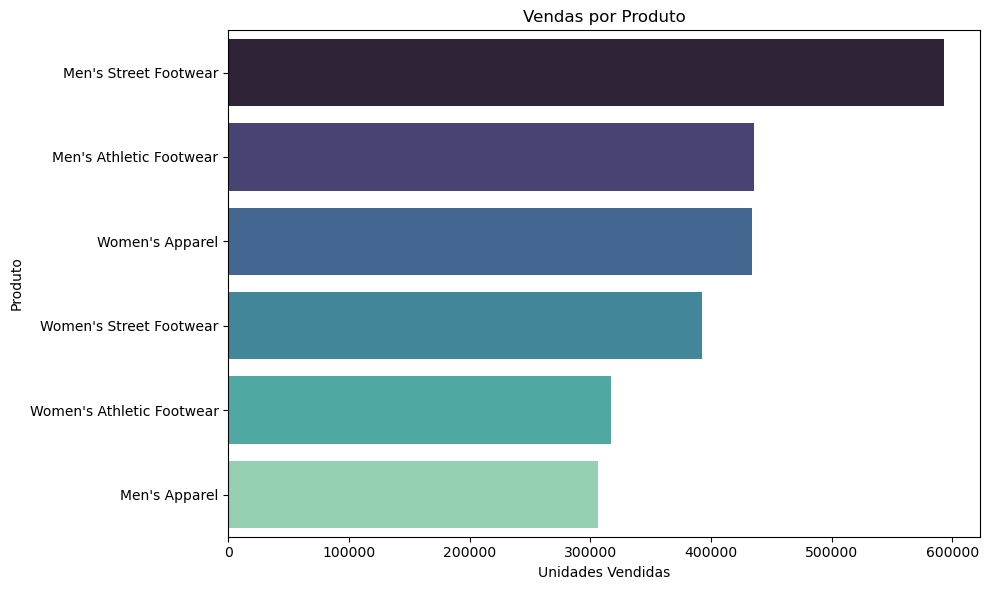

In [11]:
# Agrupamento de vendas por Produto
vendas_por_produto = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_vendas_por_produto = sns.barplot(x=vendas_por_produto.values, y=vendas_por_produto.index, palette="mako")
plt.title('Vendas por Produto')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_produto.png'
plt.savefig(file_path_resultados)

# Mostrando o gráfico
plt.show()

## 2 - Qual produto foi mais lucrativo?

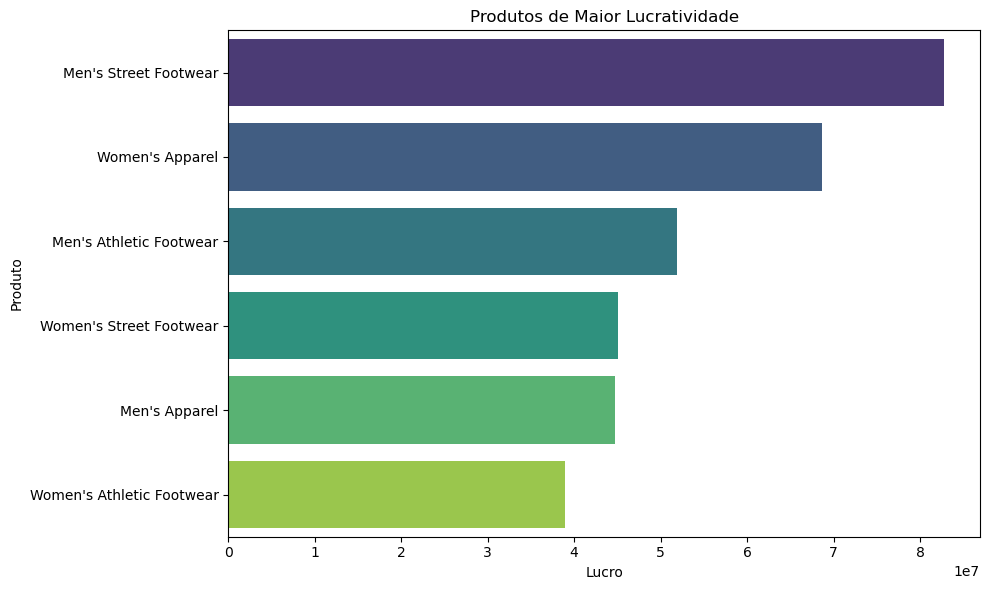

In [12]:
# Agrupamento de lucro por produto
lucro_por_produto = df.groupby('Product')['Operating Profit'].sum().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_lucro_por_produto = sns.barplot(x=lucro_por_produto.values, y=lucro_por_produto.index, palette="viridis")
plt.title('Produtos de Maior Lucratividade')
plt.xlabel('Lucro')
plt.ylabel('Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_produto.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 3 - Quais produtos possuem a maior margem operacional?

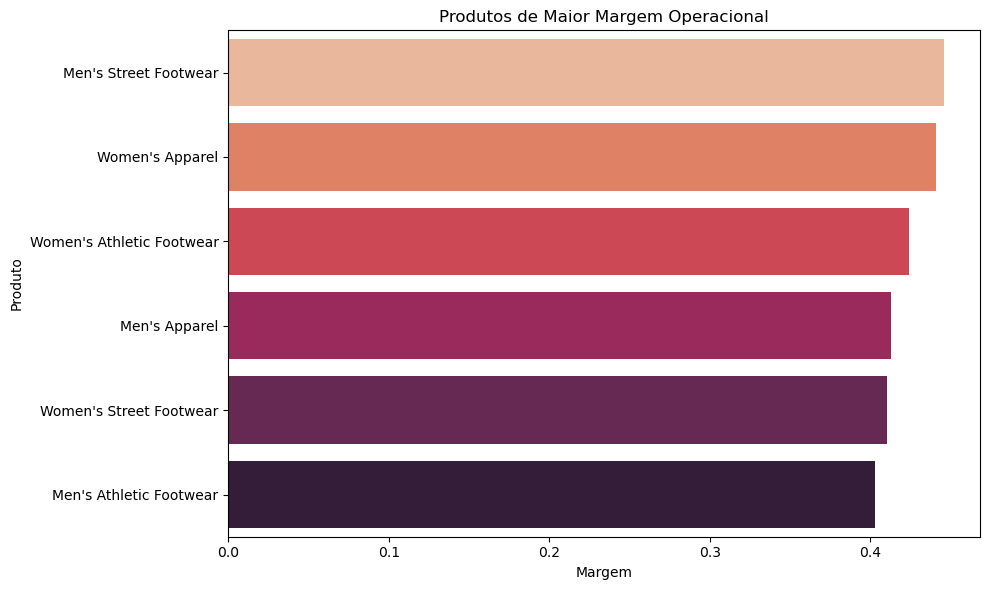

In [13]:
# Agrupamento de margem por produto
margem_por_produto = df.groupby('Product')['Operating Margin'].mean().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_margem_por_produto = sns.barplot(x=margem_por_produto.values, y=margem_por_produto.index, palette="rocket_r")
plt.title('Produtos de Maior Margem Operacional')
plt.xlabel('Margem')
plt.ylabel('Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\margem_por_produto.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 4 - Quais são os produtos com maior preço médio por unidade?

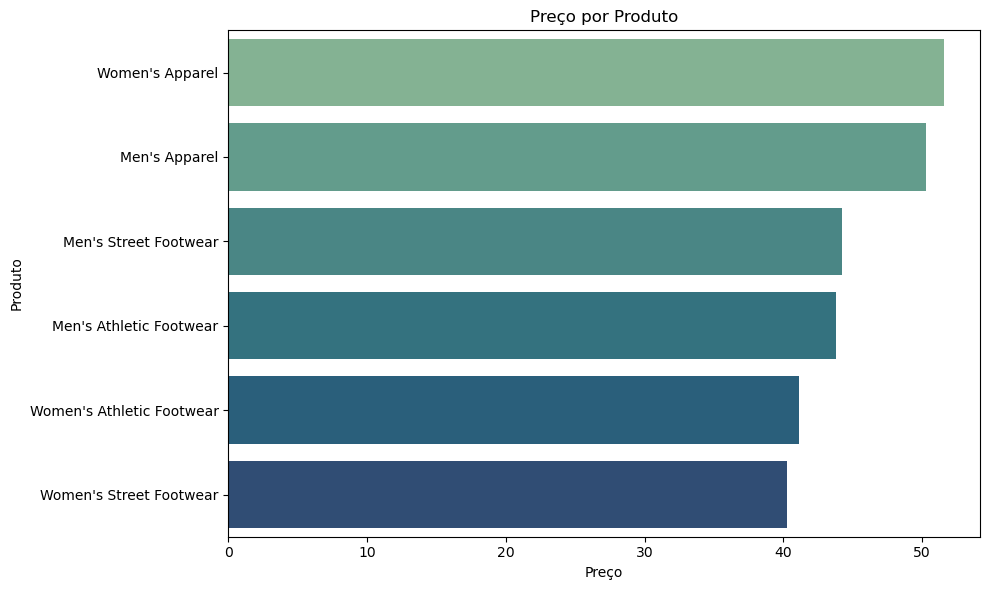

In [14]:
# Agrupamento de preço por produto
preco_por_produto = df.groupby('Product')['Price per Unit'].mean().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_preco_produto = sns.barplot(x=preco_por_produto.values, y=preco_por_produto.index, palette="crest")
plt.title('Preço por Produto')
plt.xlabel('Preço')
plt.ylabel('Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\preco_por_produto.png'
plt.savefig(file_path_resultados)

# Mostrando o gráfico
plt.show()

## 5 - Qual varejista vendeu mais produtos?

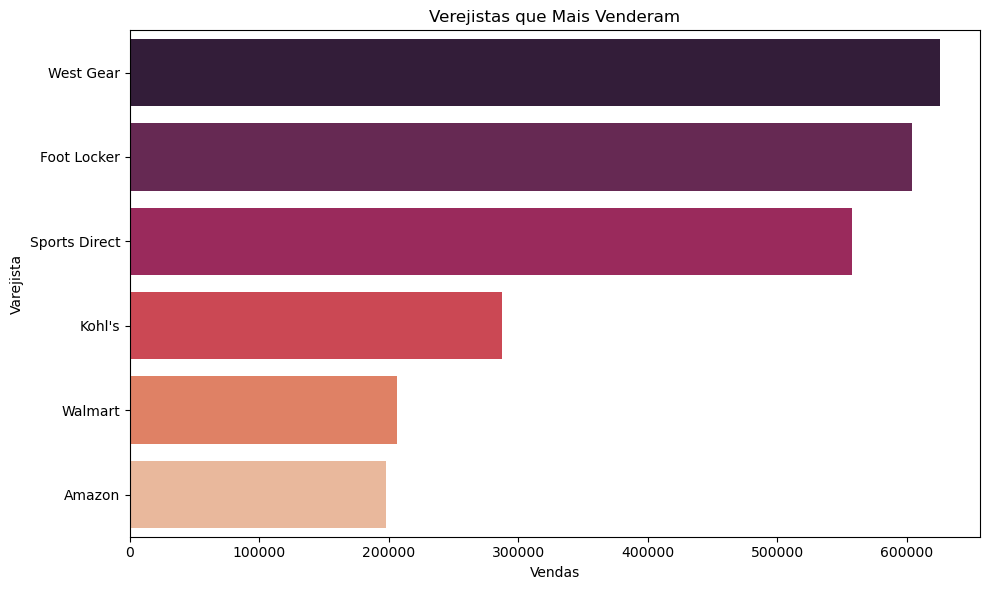

In [15]:
# Agrupamento de vendas por varejista
vendas_por_varejista = df.groupby('Retailer')['Units Sold'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_vendas_por_varejista = sns.barplot(x=vendas_por_varejista.values, y=vendas_por_varejista.index, palette="rocket")
plt.title('Verejistas que Mais Venderam')
plt.xlabel('Vendas')
plt.ylabel('Varejista')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_varejista.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 6 - Qual varejista foi mais lucrativo?

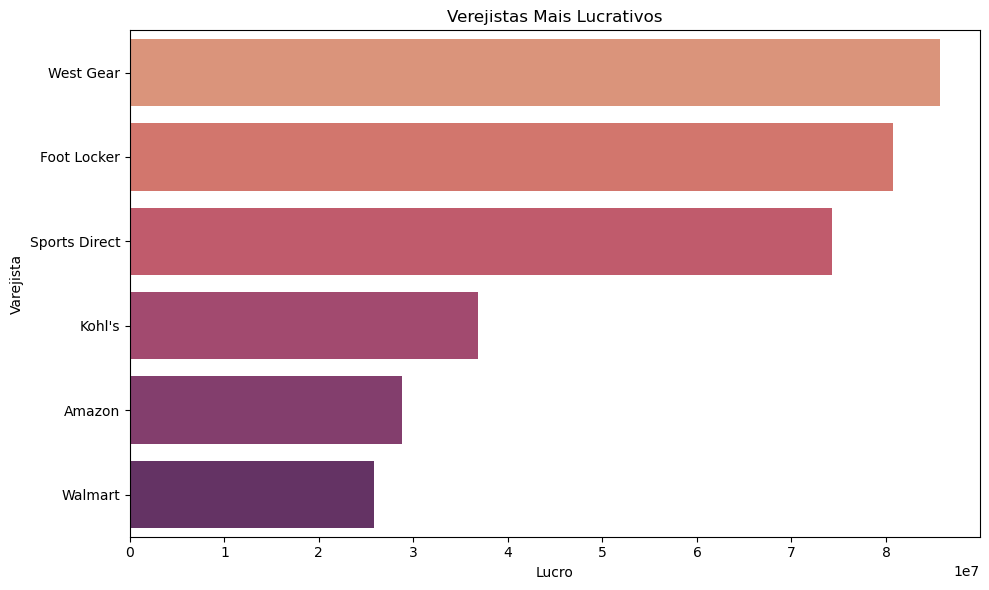

In [16]:
# Agrupamento de lucro por varejista
lucro_por_varejista = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_lucro_por_varejista = sns.barplot(x=lucro_por_varejista.values, y=lucro_por_varejista.index, palette="flare")
plt.title('Verejistas Mais Lucrativos')
plt.xlabel('Lucro')
plt.ylabel('Varejista')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_varejista.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 7 - Quais os produtos mais vendidos por varejista?

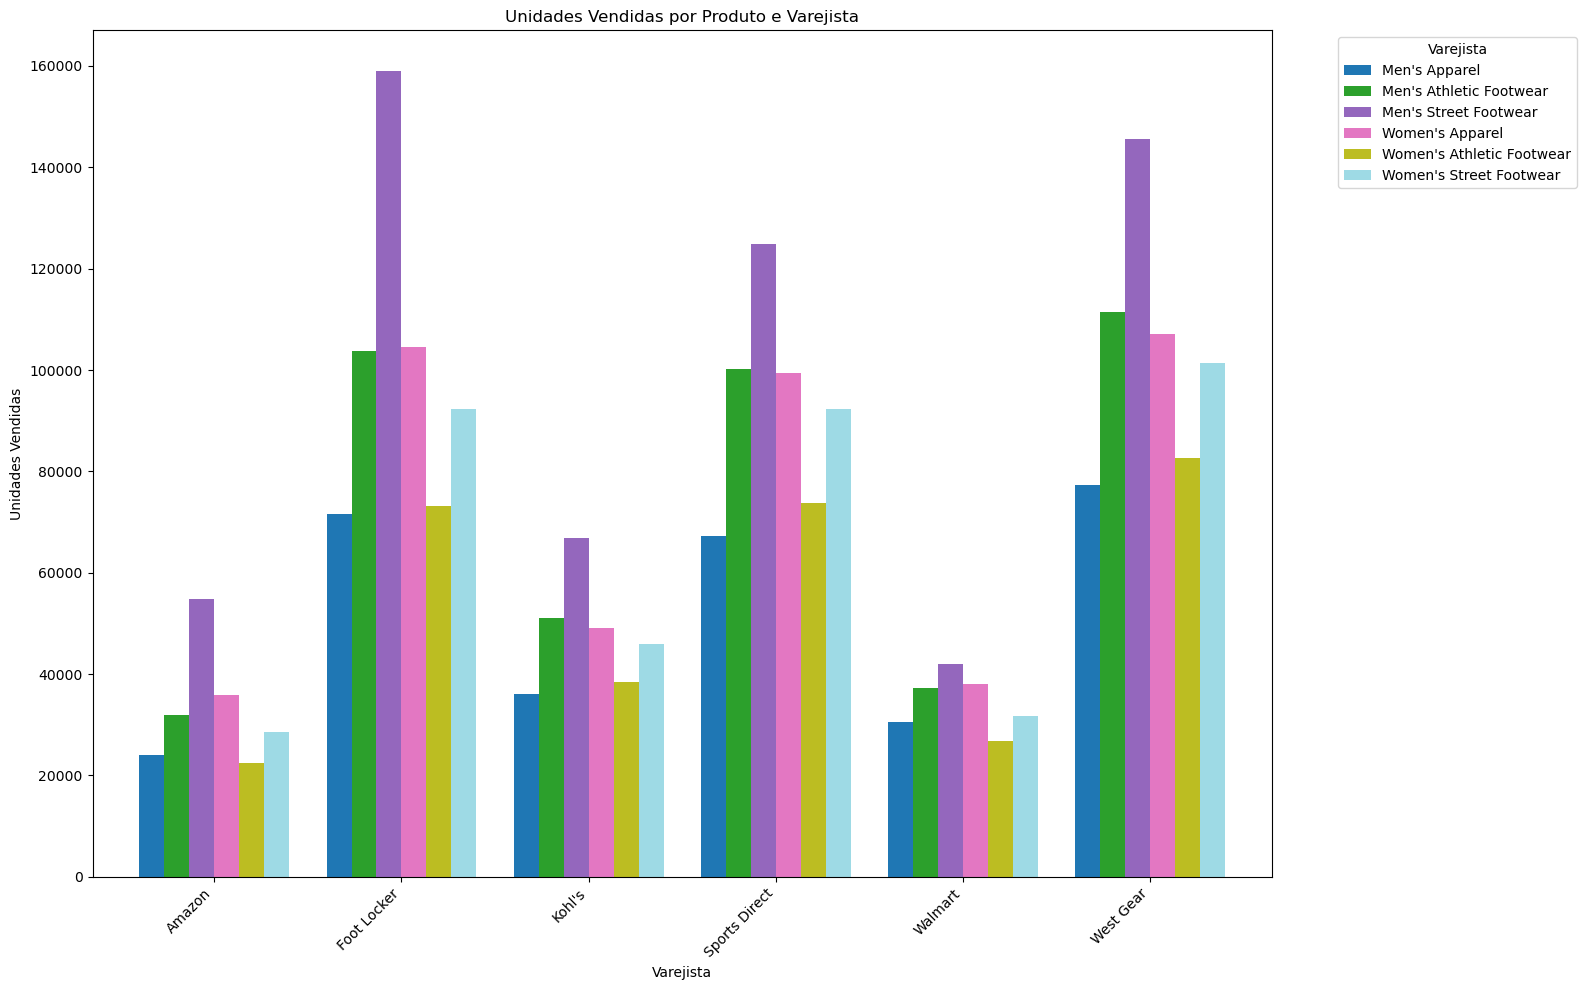

In [17]:
# Preparando os dados para o gráfico de barras agrupadas
pivot_data = df.pivot_table(index='Retailer', columns='Product', values='Units Sold', aggfunc='sum', fill_value=0)

# Criando o gráfico de barras agrupadas
pivot_data.plot(kind='bar', figsize=(16, 10), width=0.8, colormap='tab20')

plt.title('Unidades Vendidas por Produto e Varejista')
plt.xlabel('Varejista')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Varejista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\_vendas_produto_por_varejista.png'
plt.savefig(file_path_resultados)

# Mostrando o gráfico
plt.show()

## 8 - Qual região vendeu mais produtos?

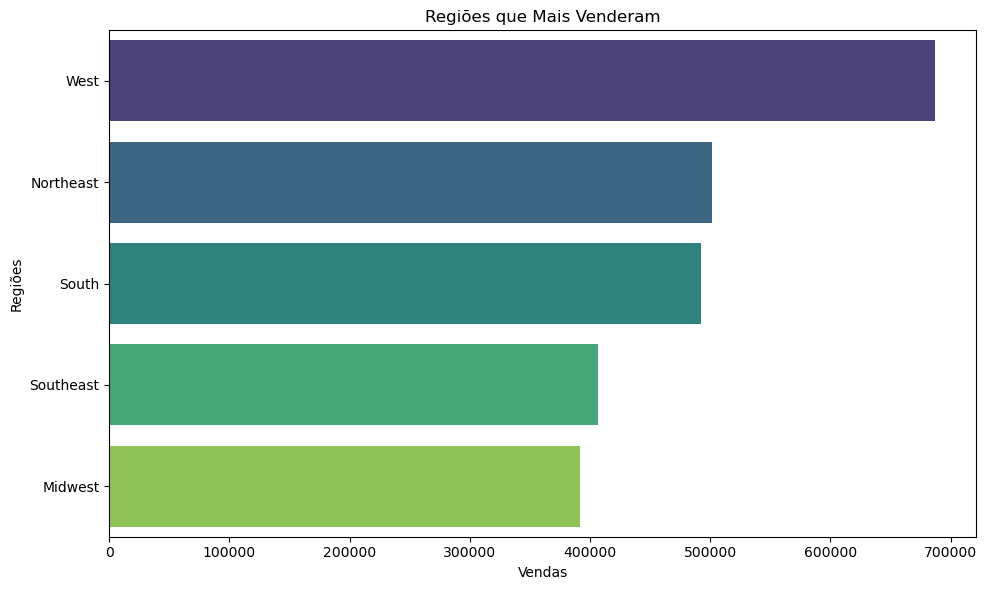

In [18]:
# Agrupando de vendas por região
venda_por_regiao = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_venda_regiao = sns.barplot(x=venda_por_regiao.values, y=venda_por_regiao.index, palette="viridis")
plt.title('Regiões que Mais Venderam')
plt.xlabel('Vendas')
plt.ylabel('Regiões')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_regiao.png'
plt.savefig(file_path_resultados)


# Showing the plot
plt.show()

## 9 - Qual região foi mais lucrativa?

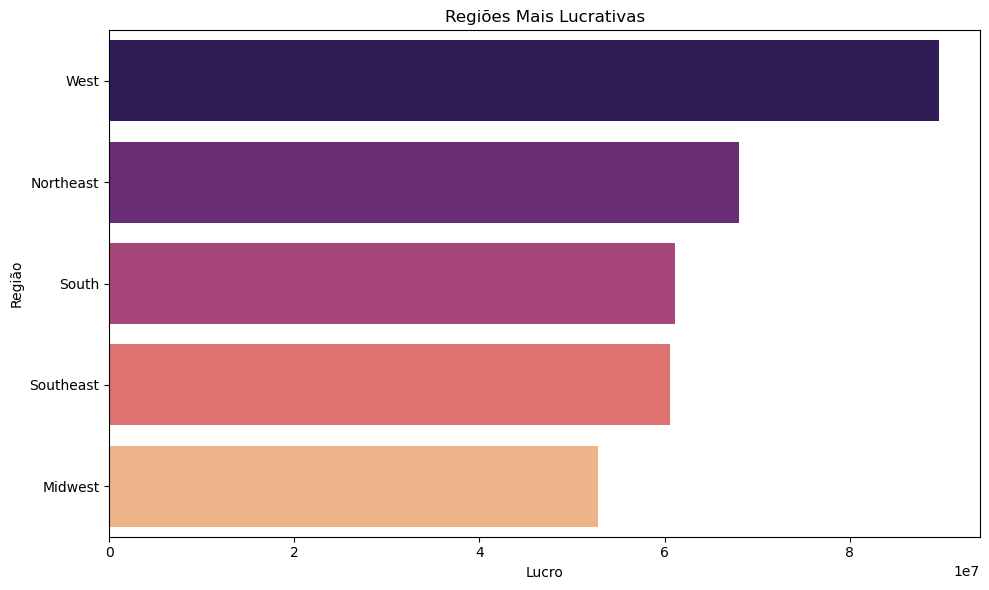

In [19]:
# Regiões Mais Lucrativas
lucro_por_regiao = df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_lucro_regiao = sns.barplot(x=lucro_por_regiao.values, y=lucro_por_regiao.index, palette="magma")
plt.title('Regiões Mais Lucrativas')
plt.xlabel('Lucro')
plt.ylabel('Região')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_regiao.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 10 - Quais varejistas venderam mais em cada região?

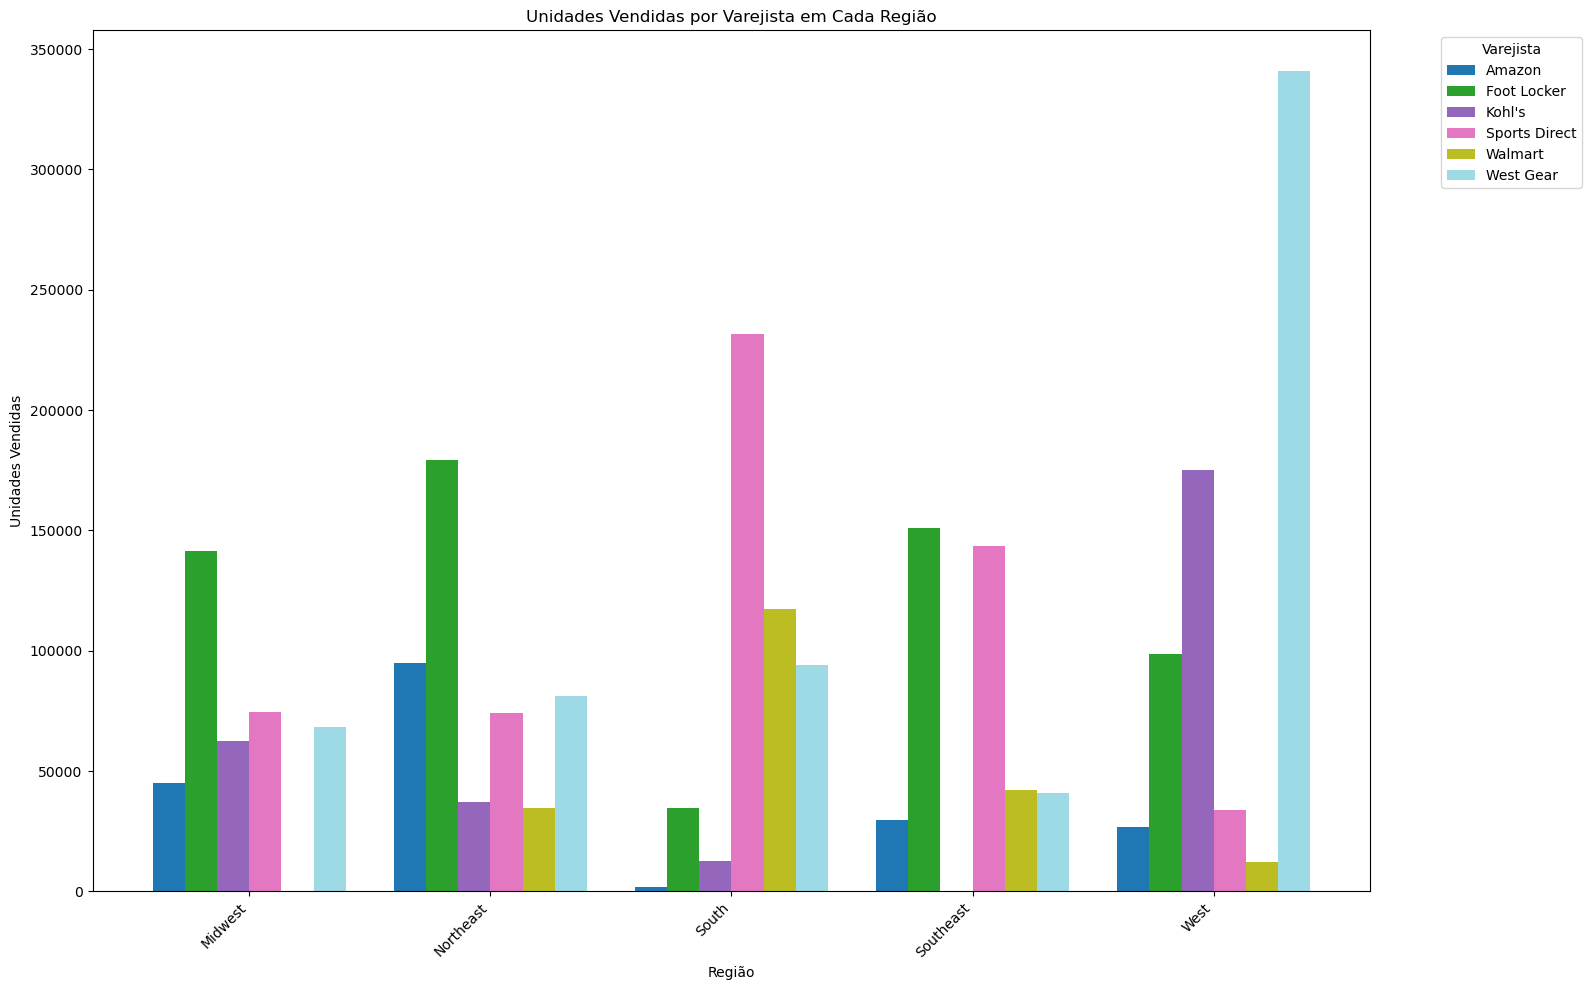

In [20]:
# Preparando os dados para o gráfico de barras agrupadas
pivot_vendas_regiao_varejista = df.pivot_table(index='Region', columns='Retailer', values='Units Sold', aggfunc='sum', fill_value=0)

# Criando o gráfico de barras agrupadas
pivot_vendas_regiao_varejista.plot(kind='bar', figsize=(16, 10), width=0.8, colormap='tab20')

plt.title('Unidades Vendidas por Varejista em Cada Região')
plt.xlabel('Região')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Varejista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\_vendas_regiao_por_varejista.png'
plt.savefig(file_path_resultados)

# Mostrando o gráfico
plt.show()

## 11 - Qual estado vendeu mais produtos?

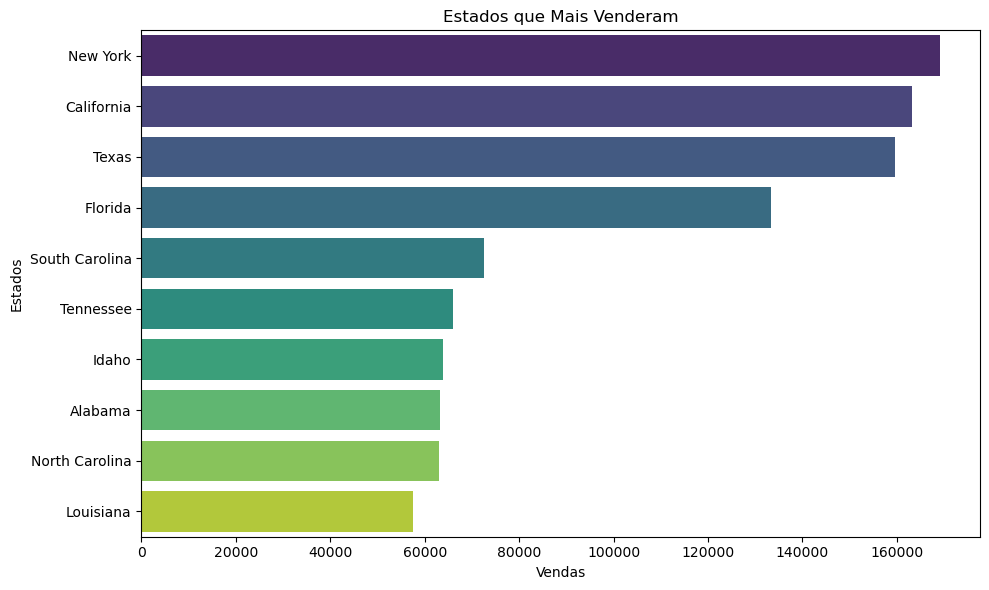

In [21]:
# Agrupamento de vendas por estado
vendas_por_estado = df.groupby('State')['Units Sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

plot_vendas__estado = sns.barplot(x=vendas_por_estado.values, y=vendas_por_estado.index, palette="viridis")
plt.title('Estados que Mais Venderam')
plt.xlabel('Vendas')
plt.ylabel('Estados')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_estado.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 12 - Quais estados venderam menos produtos?

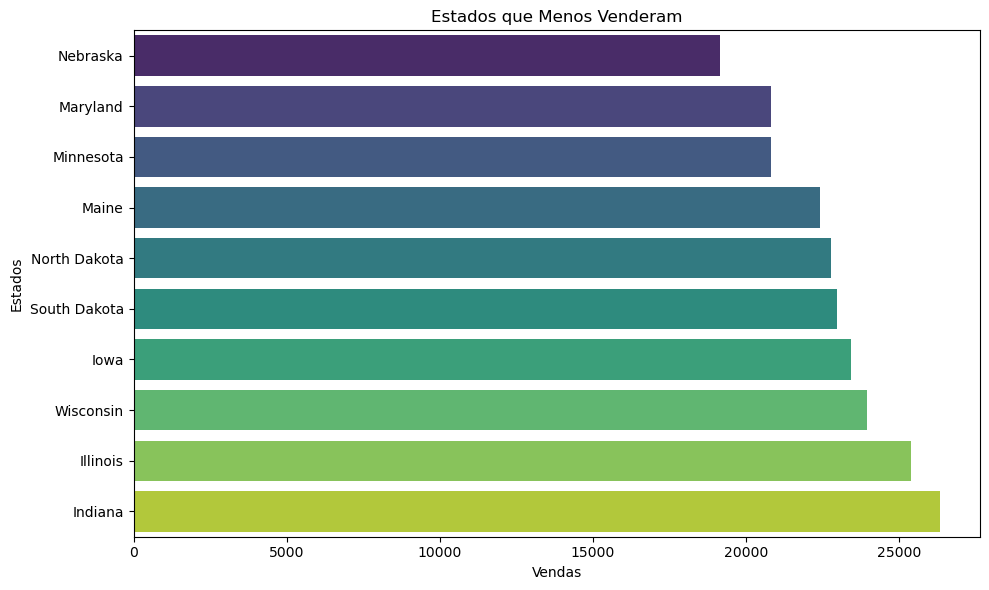

In [22]:
# Agrupamento de vendas por estado
vendas_por_estado_asc = df.groupby('State')['Units Sold'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))

plot_vendas_estado_asc = sns.barplot(x=vendas_por_estado_asc.values, y=vendas_por_estado_asc.index, palette="viridis")
plt.title('Estados que Menos Venderam')
plt.xlabel('Vendas')
plt.ylabel('Estados')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_estado_asc.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 13 - Quais os estados mais lucrativos?

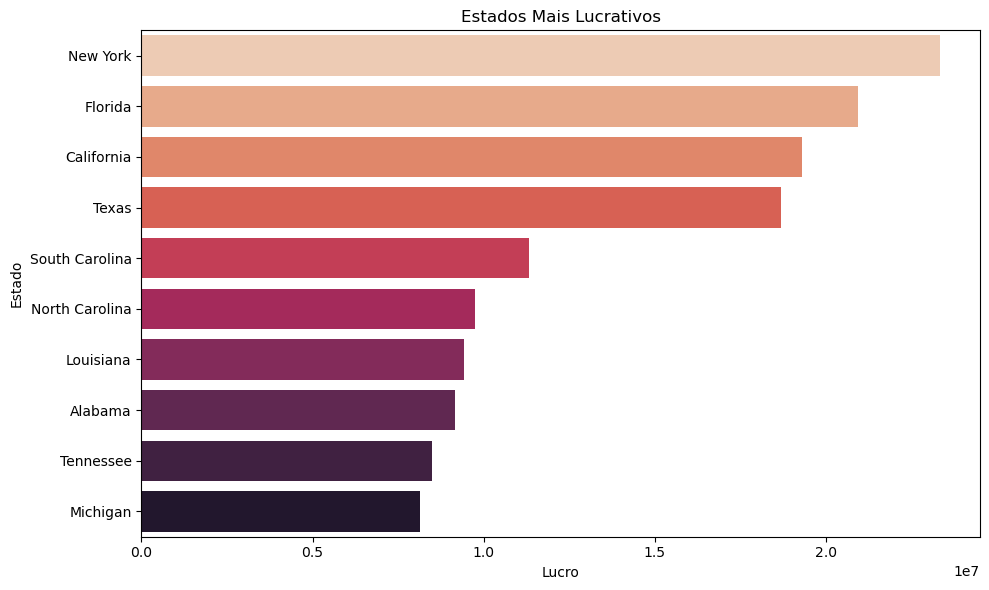

In [23]:
# Agrupamento de lucro por estado
lucro_por_produto = df.groupby('State')['Operating Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

plot_lucro_estado = sns.barplot(x=lucro_por_produto.values, y=lucro_por_produto.index, palette="rocket_r")
plt.title('Estados Mais Lucrativos')
plt.xlabel('Lucro')
plt.ylabel('Estado')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_estado.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 14 - Quais cidades venderam mais produtos?

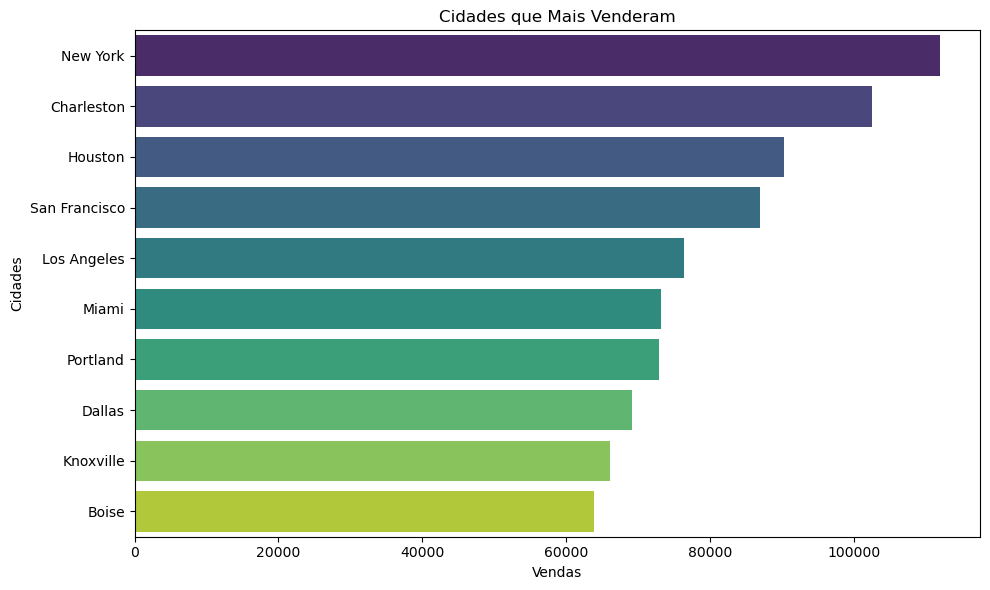

In [24]:
# Agrupamento de vendas por cidade
vendas_por_cidade = df.groupby('City')['Units Sold'].sum().sort_values(ascending=False).head(10)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_vendas_cidade = sns.barplot(x=vendas_por_cidade.values, y=vendas_por_cidade.index, palette="viridis")
plt.title('Cidades que Mais Venderam')
plt.xlabel('Vendas')
plt.ylabel('Cidades')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_cidade.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 15 - Quais cidades venderam menos produtos?

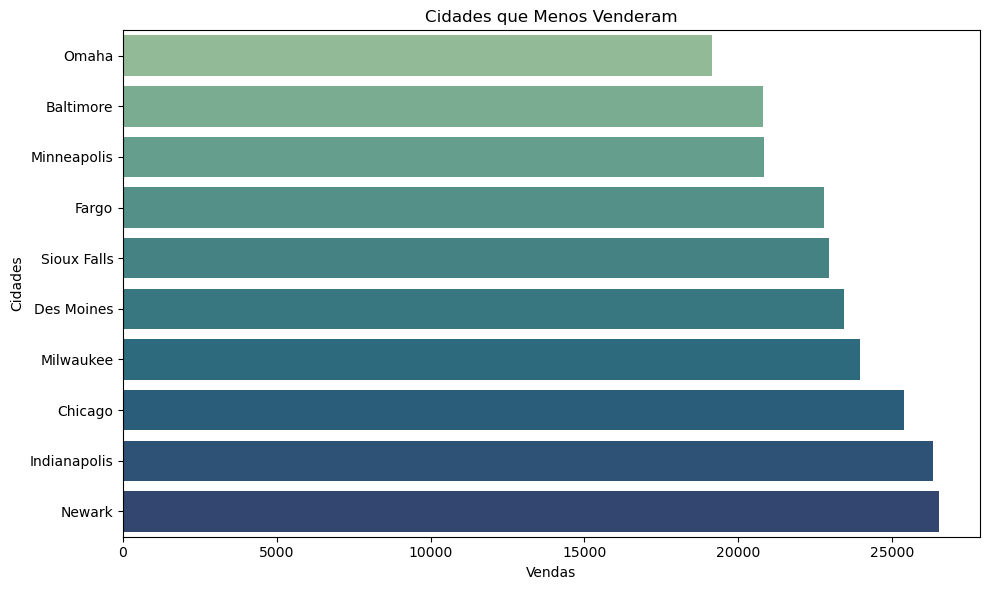

In [25]:
# Agrupamento de vendas por cidade
vendas_por_cidade_asc = df.groupby('City')['Units Sold'].sum().sort_values(ascending=True).head(10)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_vendas_cidade_asc = sns.barplot(x=vendas_por_cidade_asc.values, y=vendas_por_cidade_asc.index, palette="crest")
plt.title('Cidades que Menos Venderam')
plt.xlabel('Vendas')
plt.ylabel('Cidades')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_cidade_asc.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 16 - Qual cidade foi mais lucrativa?

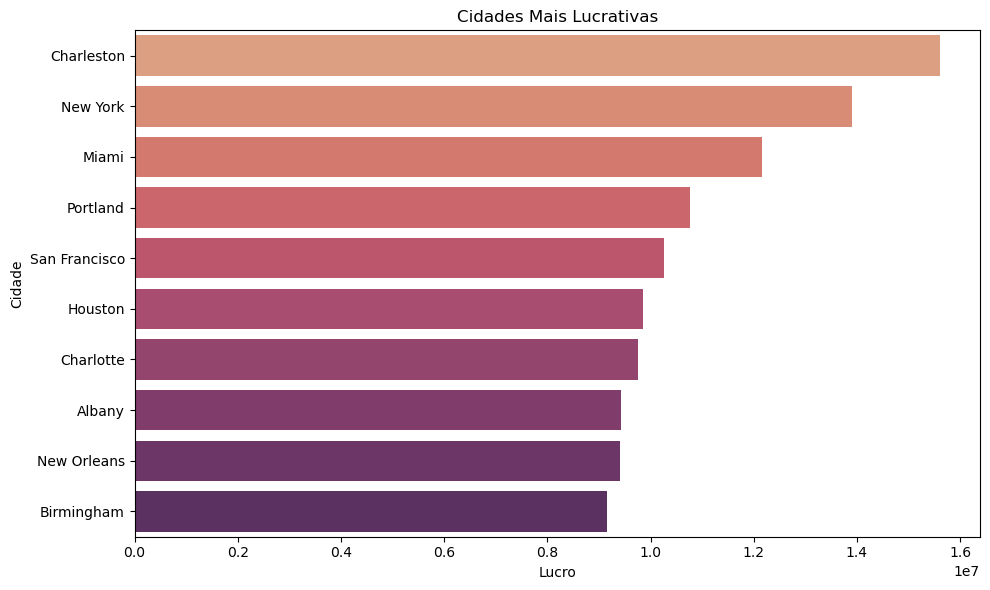

In [26]:
# Agrupamento de lucro por cidade
lucro_por_cidade = df.groupby('City')['Operating Profit'].sum().sort_values(ascending=False).head(10)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_lucro_cidade = sns.barplot(x=lucro_por_cidade.values, y=lucro_por_cidade.index, palette="flare")
plt.title('Cidades Mais Lucrativas')
plt.xlabel('Lucro')
plt.ylabel('Cidade')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_cidade.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 17 - Qual categoria de produto foi mais vendida?

In [27]:
df["Product"].unique()

array(["Men's Street Footwear", "Women's Apparel",
       "Men's Athletic Footwear", "Women's Street Footwear",
       "Women's Athletic Footwear", "Men's Apparel"], dtype=object)

In [28]:
# Categorizando os produtos
categories = ['Athletic Footwear', 'Street Footwear', 'Apparel']

# Cria a coluna 'Category' com base nas correspondências nas strings da coluna 'Product'
df['Product Category'] = df['Product'].apply(lambda x: next((cat for cat in categories if re.search(rf'\b{cat}\b', x, flags=re.IGNORECASE)), None))


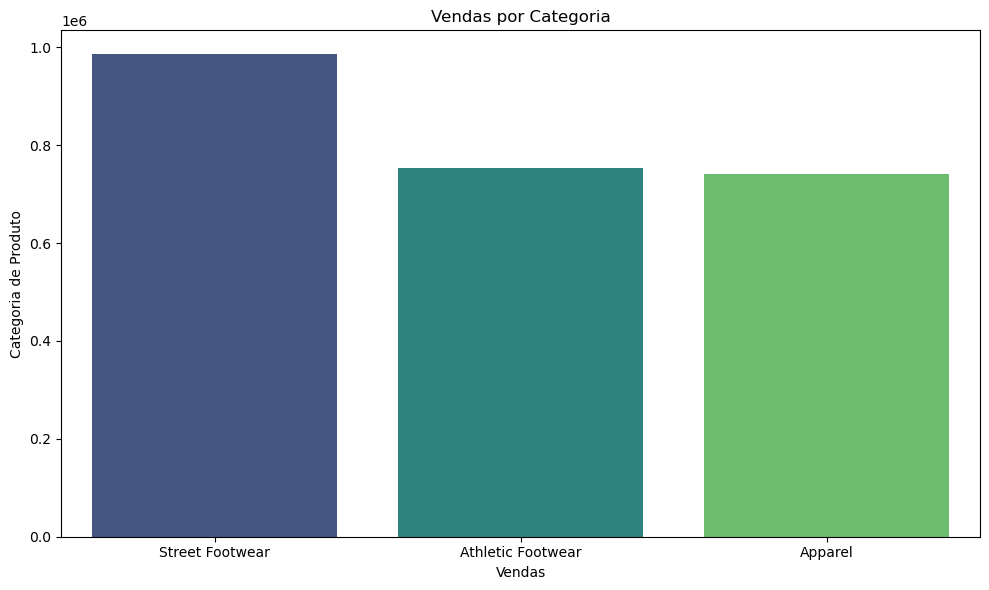

In [29]:
# Agrupamento de vendas por categoria
vendas_por_categoria = df.groupby('Product Category')['Units Sold'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_vendas_categoria = sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette="viridis")
plt.title('Vendas por Categoria')
plt.xlabel('Vendas')
plt.ylabel('Categoria de Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_categoria.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 18 - Qual categoria de produto foi mais lucrativa?

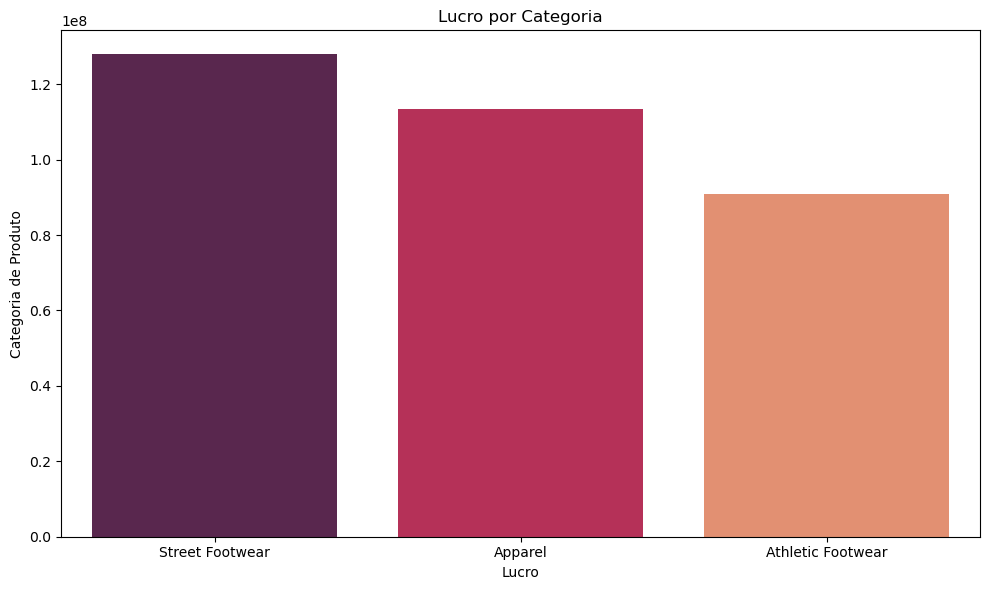

In [30]:
# Agrupamento de lucro por categoria
lucro_por_categoria = df.groupby('Product Category')['Operating Profit'].sum().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_lucro_categoria = sns.barplot(y=lucro_por_categoria.values, x=lucro_por_categoria.index, palette="rocket")
plt.title('Lucro por Categoria')
plt.xlabel('Lucro')
plt.ylabel('Categoria de Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_categoria.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 19 - Qual a margem operacional de cada categoria?

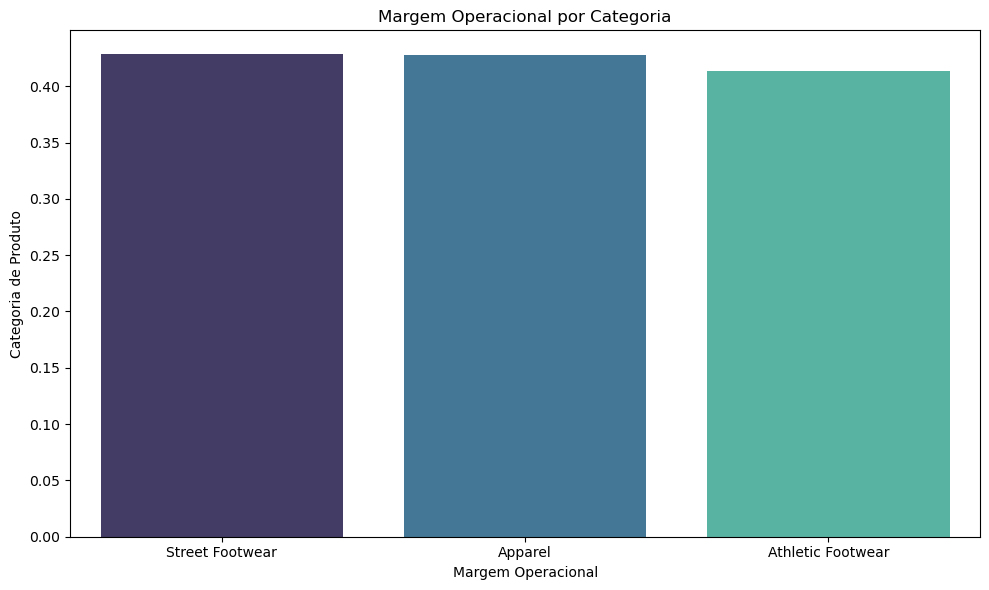

In [31]:
# Agrupamento de margem por categoria
margem_por_categoria = df.groupby('Product Category')['Operating Margin'].mean().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_margem_categoria = sns.barplot(y=margem_por_categoria.values, x=margem_por_categoria.index, palette="mako")
plt.title('Margem Operacional por Categoria')
plt.xlabel('Margem Operacional')
plt.ylabel('Categoria de Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\margem_por_categoria.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 20 - Qual o preço médio de cada categoria?

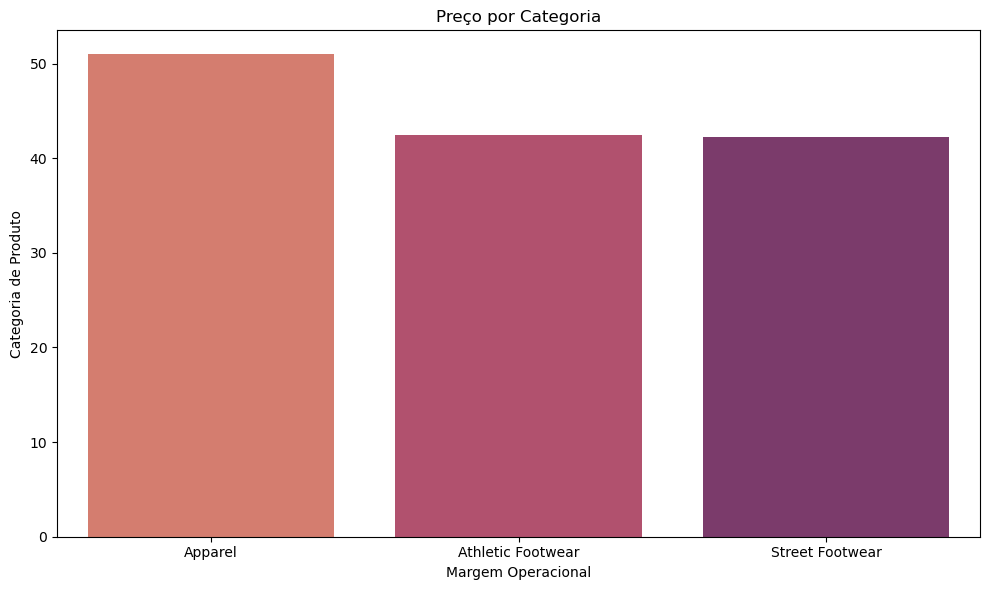

In [32]:
# Agrupamento de preço por categoria
preco_por_categoria = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_preco_categoria = sns.barplot(y=preco_por_categoria.values, x=preco_por_categoria.index, palette="flare")
plt.title('Preço por Categoria')
plt.xlabel('Margem Operacional')
plt.ylabel('Categoria de Produto')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\preco_por_categoria.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 21 - Foram vendidos mais produtos masculinos ou femininos?

In [33]:
# Categorizando os produtos
genre = ["Men's", "Women's"]

# Cria a coluna 'Category' com base nas correspondências nas strings da coluna 'Product'
df['Product Genre'] = df['Product'].apply(lambda x: next((genre for genre in genre if re.search(rf'\b{genre}\b', x, flags=re.IGNORECASE)), None))

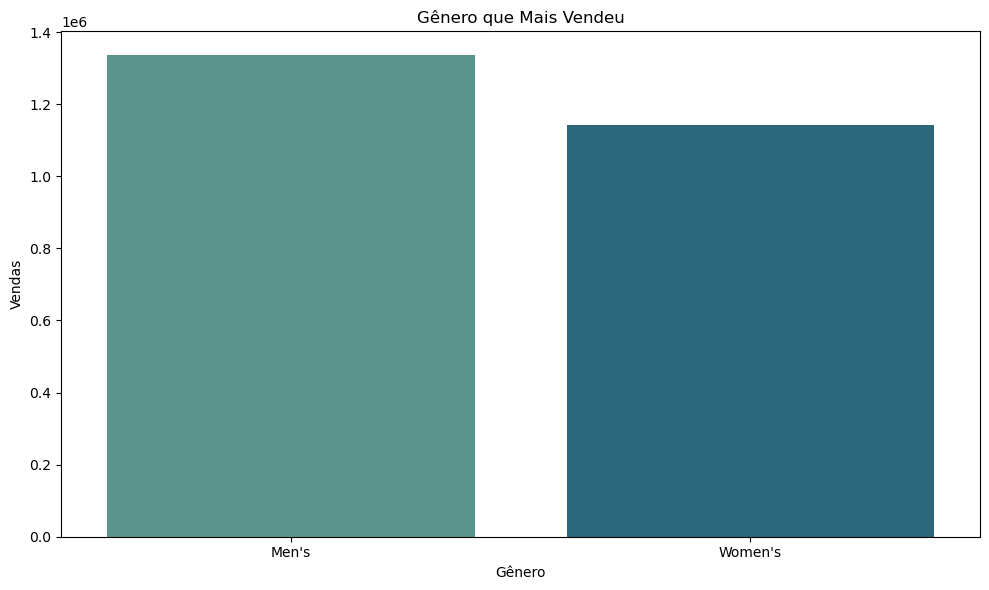

In [34]:
# Agrupamento de vendas por gênero
vendas_por_genero = df.groupby('Product Genre')['Units Sold'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_venda_genero = sns.barplot(x=vendas_por_genero.index, y=vendas_por_genero.values, palette="crest")
plt.title('Gênero que Mais Vendeu')
plt.xlabel('Gênero')
plt.ylabel('Vendas')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_genero.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 22 - Qual o gênero mais lucrativo?

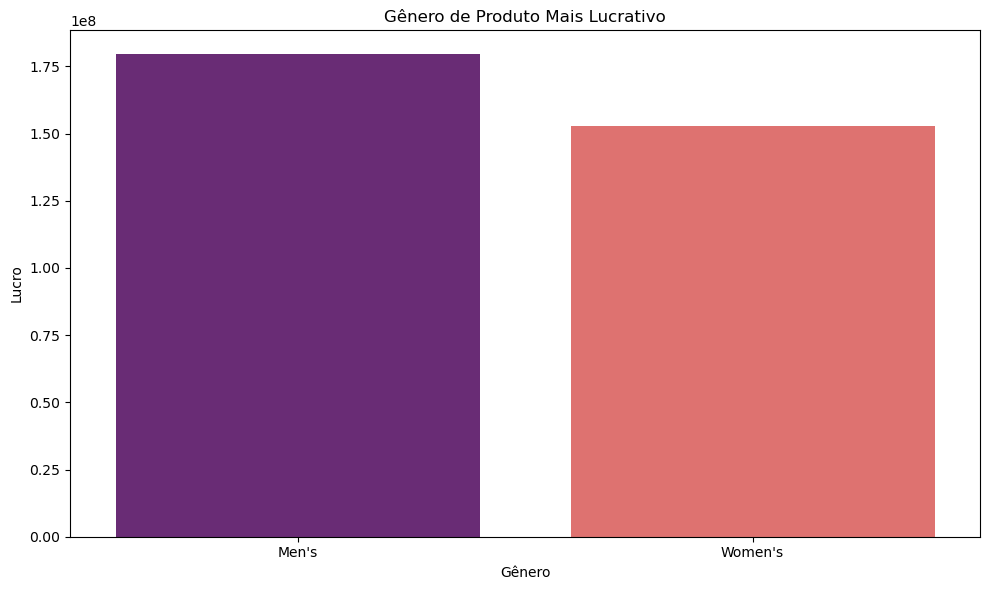

In [35]:
# Agrupamento de lucro por gênero
lucro_por_genero = df.groupby('Product Genre')['Operating Profit'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_lucro_genero = sns.barplot(y=lucro_por_genero.values, x=lucro_por_genero.index, palette="magma")
plt.title('Gênero de Produto Mais Lucrativo')
plt.xlabel('Gênero')
plt.ylabel('Lucro')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_genero.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 23 - Qual método gerou mais vendas?

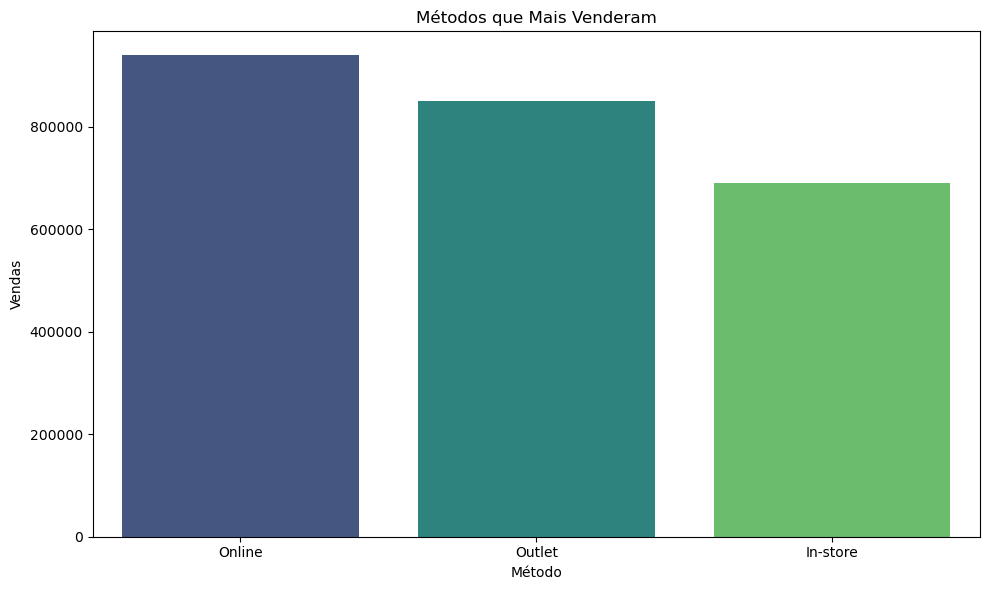

In [36]:
# Agrupamento de vendas por método
vendas_por_metodo = df.groupby('Sales Method')['Units Sold'].sum().sort_values(ascending=False)

# Plot do gráfico
plt.figure(figsize=(10, 6))

plot_vendas_metodo = sns.barplot(x=vendas_por_metodo.index, y=vendas_por_metodo.values, palette="viridis")
plt.title('Métodos que Mais Venderam')
plt.xlabel('Método')
plt.ylabel('Vendas')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\vendas_por_metodo.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 24 - Qual o método de vendas mais lucrativo?

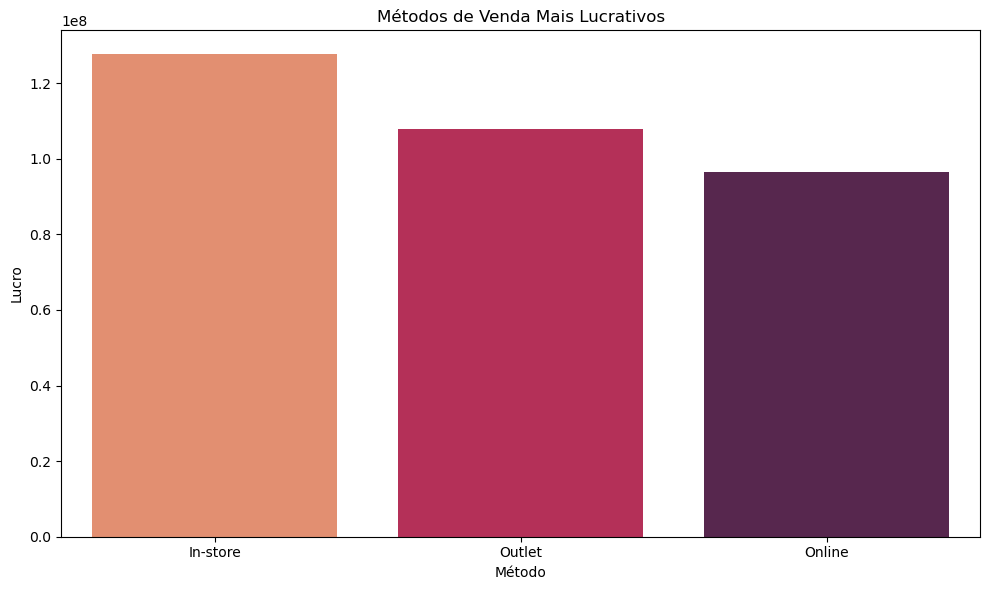

In [37]:
# Agrupamento de lucro por método
lucro_por_metodo = df.groupby('Sales Method')['Operating Profit'].sum().sort_values(ascending=False)

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_lucro_metodo = sns.barplot(y=lucro_por_metodo.values, x=lucro_por_metodo.index, palette="rocket_r")
plt.title('Métodos de Venda Mais Lucrativos')
plt.xlabel('Método')
plt.ylabel('Lucro')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\lucro_por_metodo.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 25 - Existe diferença de preço de produto entre os métodos de venda?

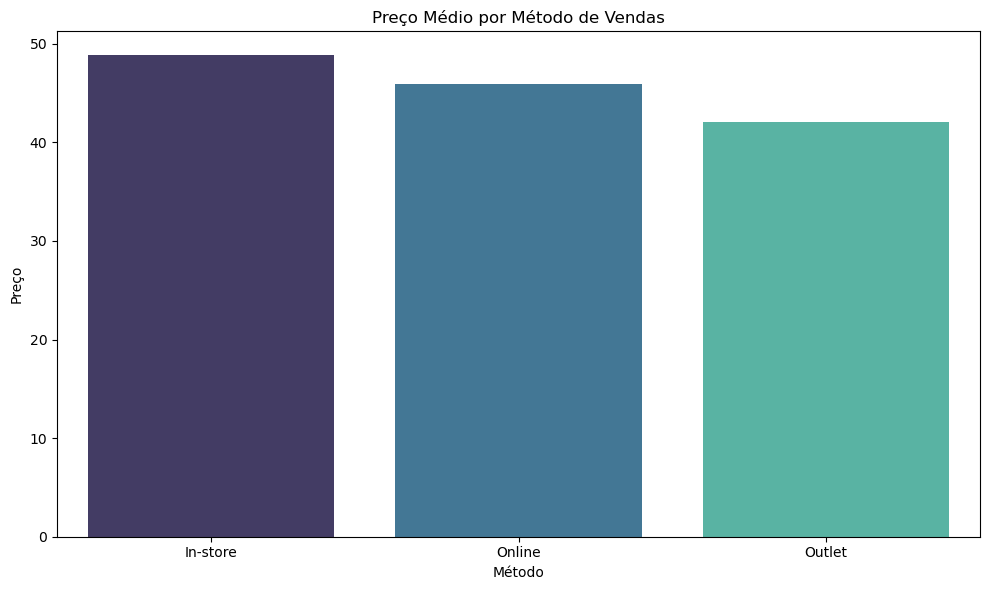

In [38]:
# Agrupamento de preço por método
preco_por_metodo = df.groupby('Sales Method')['Price per Unit'].mean()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plot_preco_metodo = sns.barplot(y=preco_por_metodo.values, x=preco_por_metodo.index, palette="mako")
plt.title('Preço Médio por Método de Vendas')
plt.xlabel('Método')
plt.ylabel('Preço')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\preco_por_metodo.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()

## 26 - Quais os métodos de venda mais populares por região?

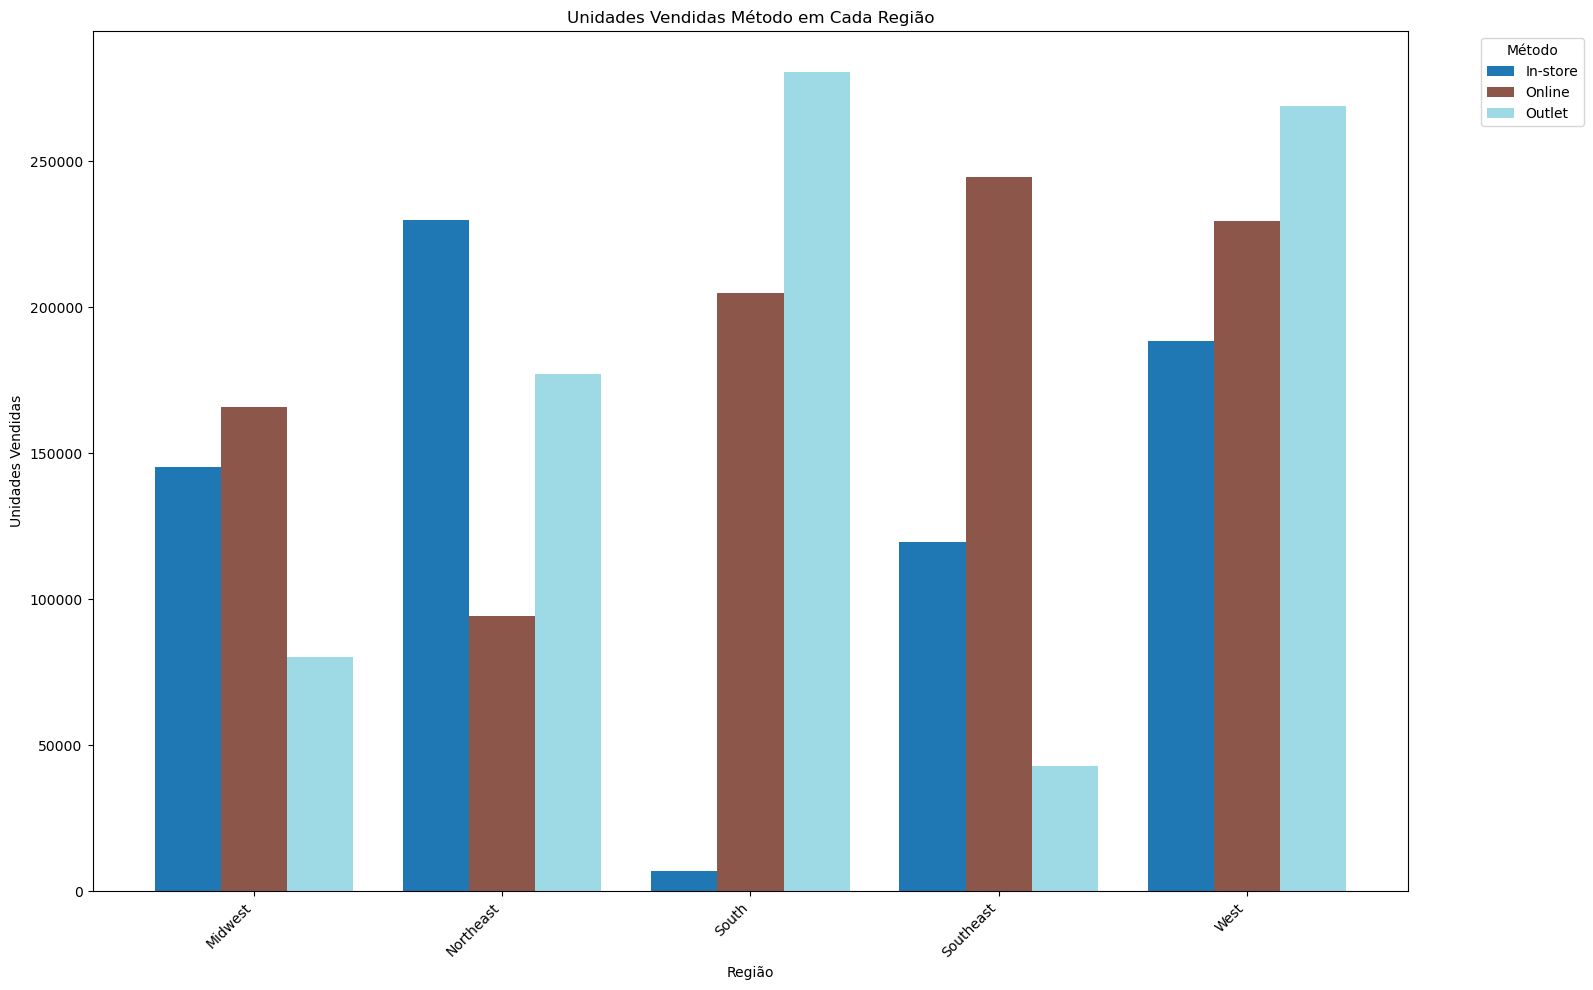

In [39]:
# Preparando os dados para o gráfico de barras agrupadas
pivot_vendas_regiao_metodo = df.pivot_table(index='Region', columns='Sales Method', values='Units Sold', aggfunc='sum', fill_value=0)

# Criando o gráfico de barras agrupadas
pivot_vendas_regiao_metodo.plot(kind='bar', figsize=(16, 10), width=0.8, colormap='tab20')

plt.title('Unidades Vendidas Método em Cada Região')
plt.xlabel('Região')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Método', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\_vendas_regiao_por_metodo.png'
plt.savefig(file_path_resultados)

# Mostrando o gráfico
plt.show()

## 27 - Como as vendas se comportaram ao longo do tempo?

In [40]:
# Criar novas colunas para dia, semana e mês
df['Month'] = df['Invoice Date'].dt.month
df['Semester'] = pd.PeriodIndex(df['Invoice Date'], freq='Q-DEC').strftime('%Y-Q%q')

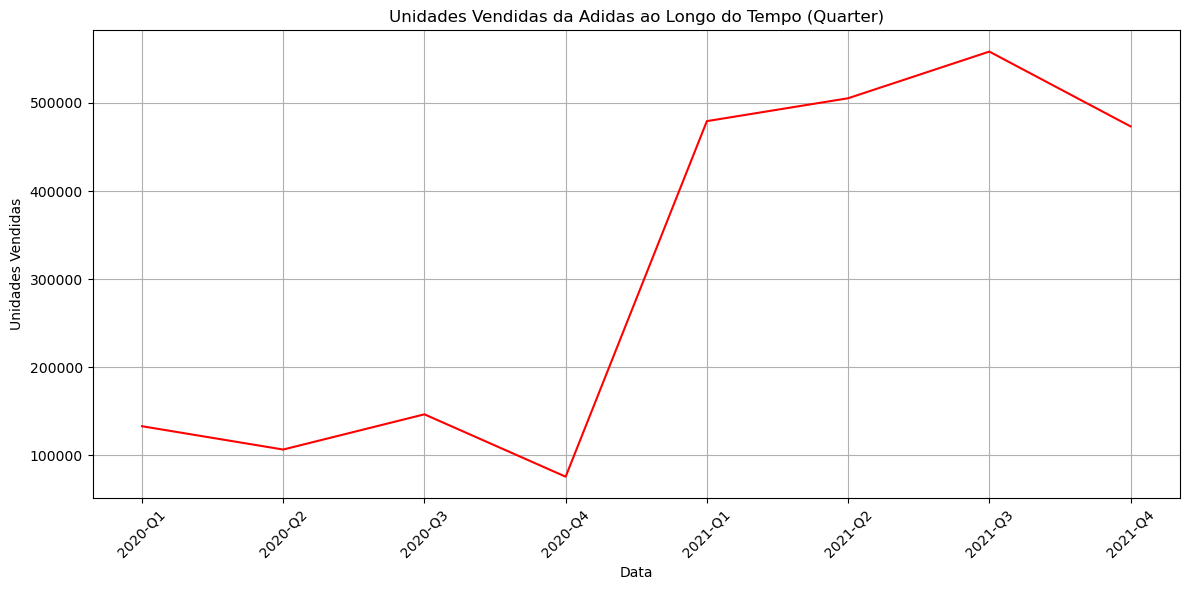

In [41]:
# Agrupamento de vendas por quarter
vendas_por_quarter = df.groupby('Semester')['Units Sold'].sum().reset_index()

# Criando o gráfico de séries temporais para as unidades vendidas
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_quarter['Semester'], vendas_por_quarter['Units Sold'],linestyle='-', color='red')
plt.title('Unidades Vendidas da Adidas ao Longo do Tempo (Quarter)')
plt.xlabel('Data')
plt.ylabel('Unidades Vendidas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\_vendas_quarter.png'
plt.savefig(file_path_resultados)

# Mostrar o gráfico
plt.show()

## 28 - Como o preço variou ao longo do tempo?

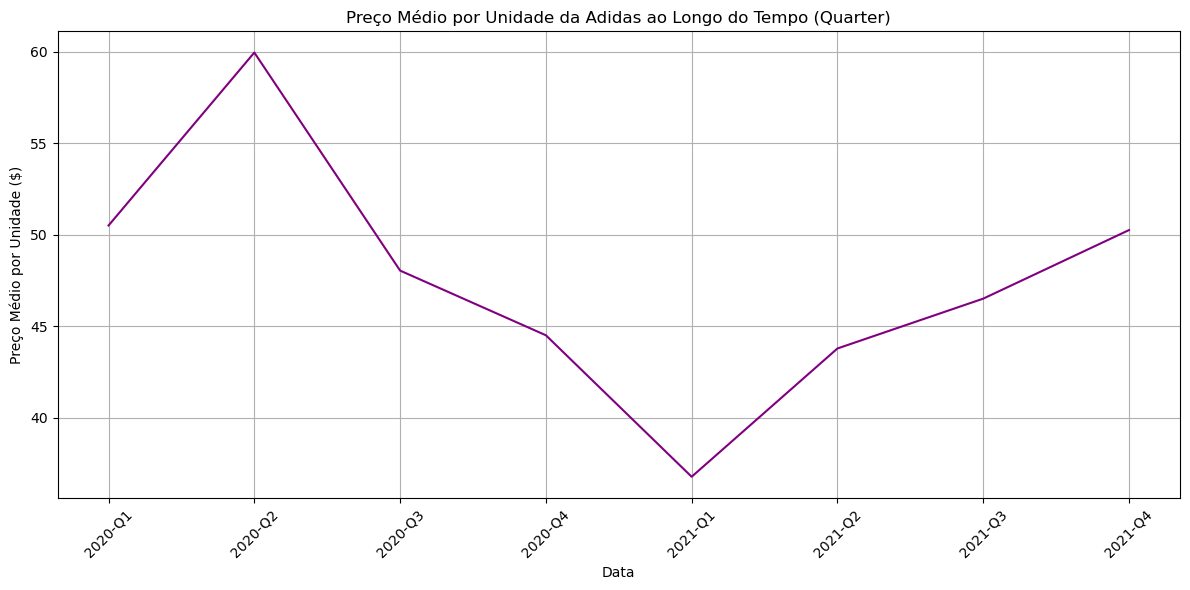

In [42]:
# Agrupar os dados por data da fatura e calcular a média do preço por unidade para cada quarter
preco_por_tempo_semestre = df.groupby('Semester')['Price per Unit'].mean().reset_index()

# Criar o gráfico de séries temporais para o preço médio por unidade
plt.figure(figsize=(12, 6))
plt.plot(preco_por_tempo_semestre['Semester'], preco_por_tempo_semestre['Price per Unit'], linestyle='-', color='purple')
plt.title('Preço Médio por Unidade da Adidas ao Longo do Tempo (Quarter)')
plt.xlabel('Data')
plt.ylabel('Preço Médio por Unidade ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\preco_por_tempo_semestre.png'
plt.savefig(file_path_resultados)

# Mostrar o gráfico
plt.show()

## 29 - Como o preço impactou o número de vendas ao longo do tempo?

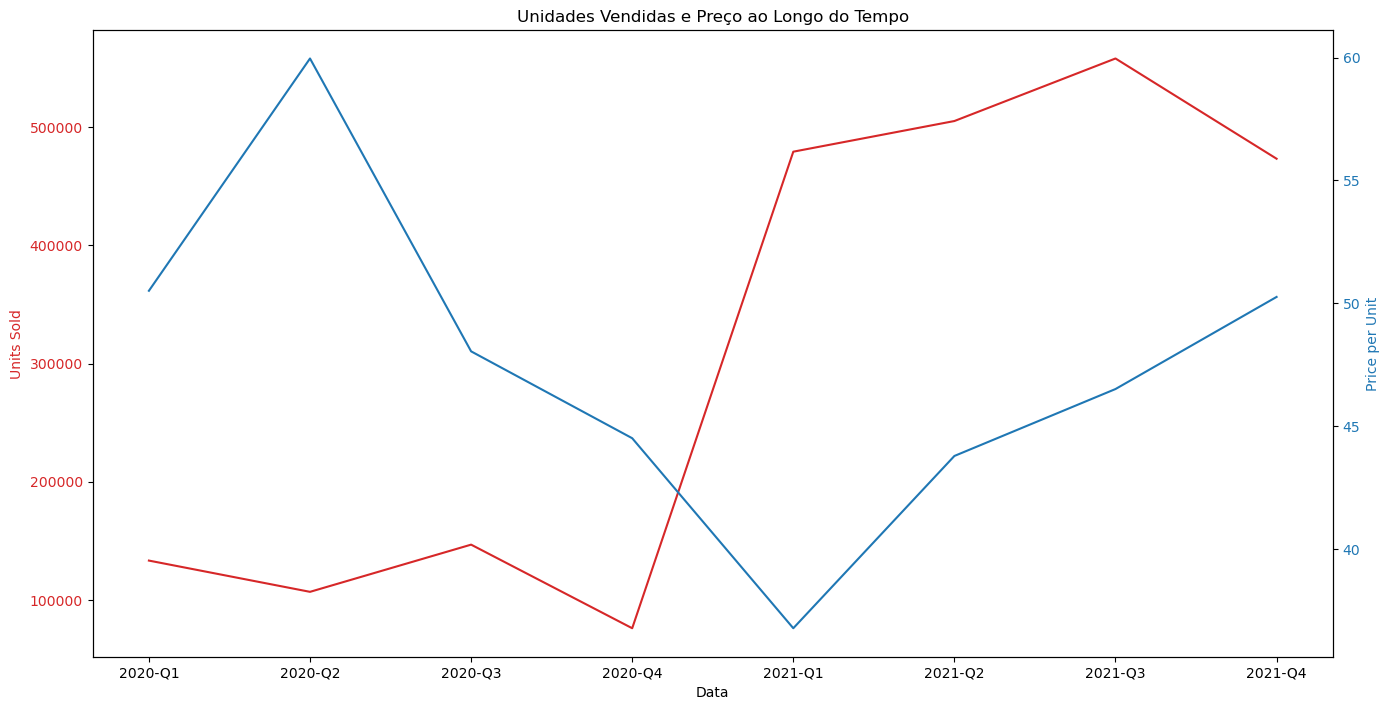

In [43]:
# Criar o gráfico combinado usando as variáveis especificadas
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('Units Sold', color=color)
ax1.plot(vendas_por_quarter['Semester'], vendas_por_quarter['Units Sold'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Criar um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Price per Unit', color=color)
ax2.plot(preco_por_tempo_semestre['Semester'], preco_por_tempo_semestre['Price per Unit'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\preco_vendas_por_tempo_semestre.png'
plt.savefig(file_path_resultados)

fig.tight_layout()  # Para garantir um layout sem sobreposição
plt.title('Unidades Vendidas e Preço ao Longo do Tempo')
plt.show()

## 30 - Qual combinação de variáveis gerou mais vendas?

In [44]:
# Agrupar os dados pelas variáveis categóricas e somar as "Units Sold"
dados_agrupados_1 = df.groupby(['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method'])['Units Sold'].sum().reset_index()

# Selecionar as 5 melhores combinações de vendas por unidades vendidas
melhores_combinacoes = dados_agrupados_1.sort_values(by='Units Sold', ascending=False).head(5)

# Exibir a tabela com as 5 melhores combinações
melhores_combinacoes.reset_index(drop=True)
melhores_combinacoes.index = range(1, len(melhores_combinacoes) + 1)
melhores_combinacoes

,Retailer,Region,State,City,Product,Sales Method,Units Sold
1,West Gear,West,California,San Francisco,Men's Street Footwear,Outlet,13319
2,Foot Locker,Southeast,South Carolina,Charleston,Men's Street Footwear,Online,13204
3,Kohl's,West,California,Los Angeles,Men's Street Footwear,Outlet,12287
4,West Gear,West,California,San Francisco,Men's Athletic Footwear,Outlet,12046
5,West Gear,West,California,San Francisco,Women's Apparel,Outlet,12007


## 31 - Qual combinação de variáveis gerou mais lucro?

In [45]:
dados_agrupados_2 = df.groupby(['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method'])['Operating Profit'].sum().reset_index()

# Selecionar as 5 melhores combinações de vendas por unidades vendidas
melhores_combinacoes_lucro = dados_agrupados_2.sort_values(by='Operating Profit', ascending=False).head(5)

# Exibir a tabela com as 5 melhores combinações
melhores_combinacoes_lucro.reset_index(drop=True)
melhores_combinacoes_lucro.index = range(1, len(melhores_combinacoes_lucro) + 1)
melhores_combinacoes_lucro

,Retailer,Region,State,City,Product,Sales Method,Operating Profit
1,Foot Locker,Southeast,South Carolina,Charleston,Men's Street Footwear,Online,2621320.68
2,Foot Locker,Southeast,South Carolina,Charleston,Women's Apparel,Online,2442784.33
3,West Gear,West,California,San Francisco,Men's Apparel,Outlet,2423348.47
4,Sports Direct,South,Alabama,Birmingham,Women's Apparel,Outlet,2309289.07
5,Sports Direct,South,Texas,Dallas,Women's Apparel,Outlet,2247003.18


## 32 - Qual produto é mais popular em cada cidade?

In [46]:
# Agrupar os dados por cidade e produto, e somar as unidades vendidas
produto_por_cidade = df.groupby(['City', 'Product'])['Units Sold'].sum().reset_index()

# Ordenar os dados dentro de cada cidade por 'Units Sold' em ordem decrescente
produto_por_cidade = produto_por_cidade.sort_values(by=['City', 'Units Sold'], ascending=[True, False])

# Pegar a primeira ocorrência de cada cidade, que corresponde ao produto mais vendido
produto_por_cidade_max = produto_por_cidade.groupby('City').head(1)

produtos_mais_populares = pd.DataFrame(produto_por_cidade_max['Product'].value_counts())

produtos_mais_populares

,count
Product,
Men's Street Footwear,52


## 33 - Qual o método de vendas mais popular em cada cidade?

In [47]:
# Agrupar os dados por cidade e produto, e somar as unidades vendidas
metodo_por_cidade = df.groupby(['City', 'Sales Method'])['Units Sold'].sum().reset_index()


# Ordenar os dados dentro de cada cidade por 'Units Sold' em ordem decrescente
metodo_por_cidade = metodo_por_cidade.sort_values(by=['City', 'Units Sold'], ascending=[True, False])

# Pegar a primeira ocorrência de cada cidade, que corresponde ao produto mais vendido
metodo_por_cidade_max = metodo_por_cidade.groupby('City').head(1)

metodo_por_cidade_max

,City,Sales Method,Units Sold
0,Albany,In-store,44935
2,Albuquerque,Online,42021
5,Anchorage,Outlet,24160
6,Atlanta,Online,44985
8,Baltimore,In-store,16360
11,Billings,Outlet,33450
13,Birmingham,Outlet,52344
14,Boise,Online,50817
16,Boston,In-store,20560
19,Burlington,In-store,24235


## 34 - Qual categoria de produto é mais popular em cada cidade?

In [48]:
# Agrupar os dados por cidade e produto, e somar as unidades vendidas
categoria_por_cidade = df.groupby(['City', 'Product Category'])['Units Sold'].sum().reset_index()

# Ordenar os dados dentro de cada cidade por 'Units Sold' em ordem decrescente
categoria_por_cidade = categoria_por_cidade.sort_values(by=['City', 'Units Sold'], ascending=[True, False])

# Pegar a primeira ocorrência de cada cidade, que corresponde ao produto mais vendido
categoria_por_cidade_max = categoria_por_cidade.groupby('City').head(1)

categorias_mais_populares = pd.DataFrame(categoria_por_cidade_max['Product Category'].value_counts())

categorias_mais_populares

,count
Product Category,
Street Footwear,52


## 35 - Qual produto é mais popular em cada região?

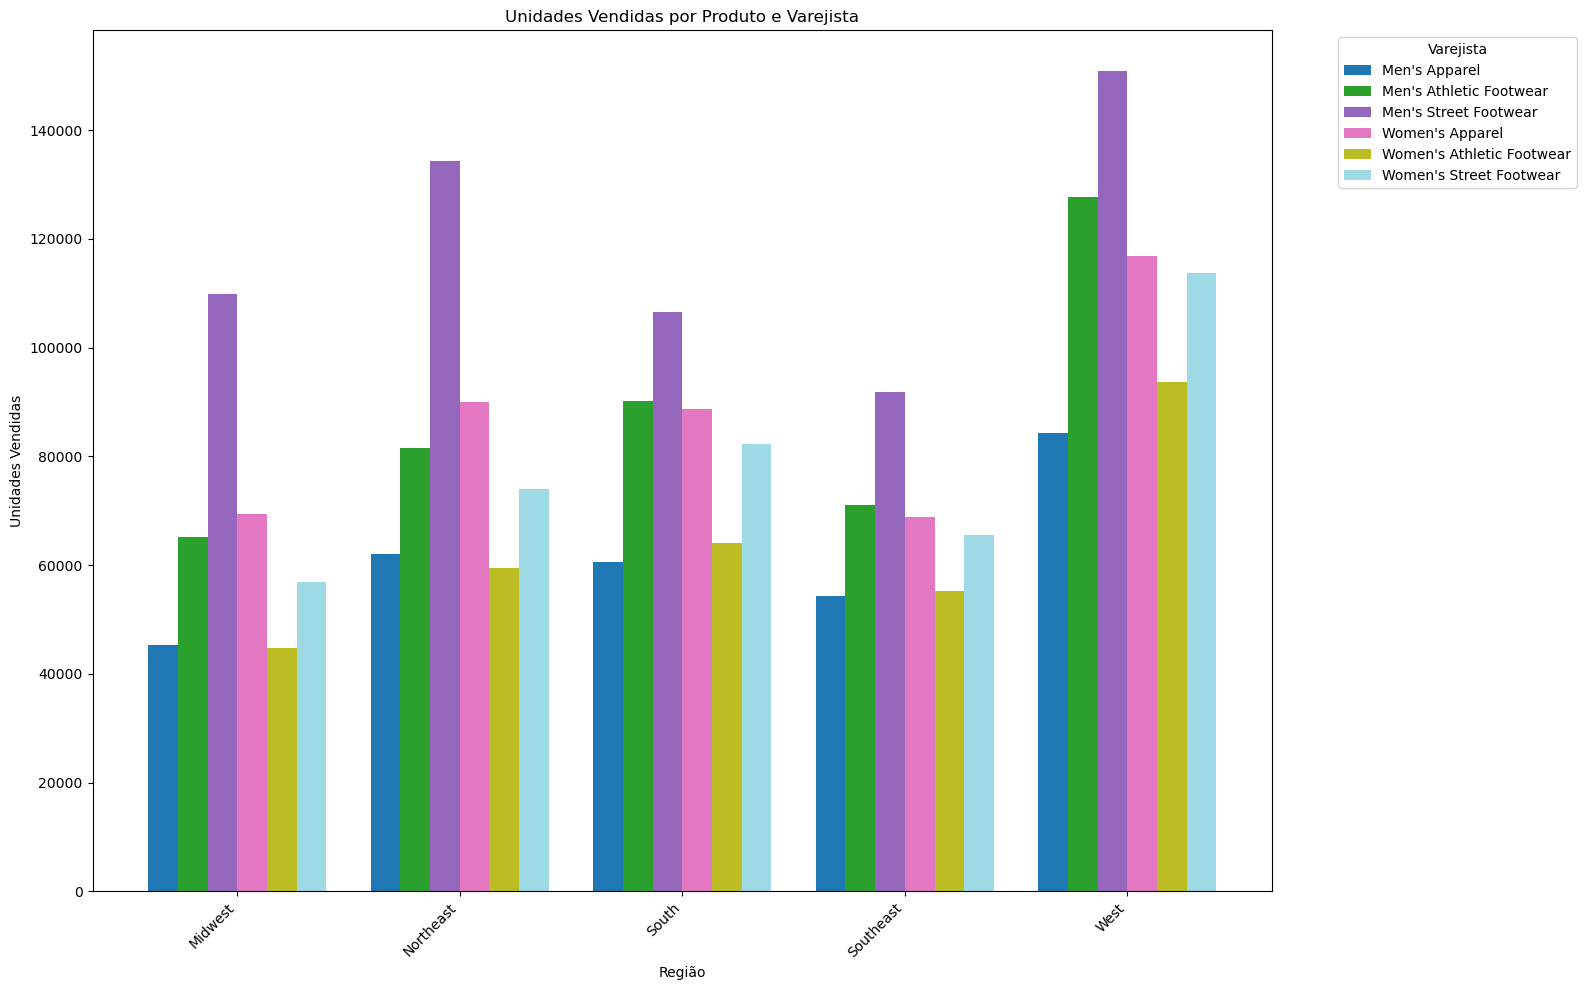

In [49]:
# Preparando os dados para o gráfico de barras agrupadas
pivot_data_p_regiao = df.pivot_table(index='Region', columns='Product', values='Units Sold', aggfunc='sum', fill_value=0)

# Criando o gráfico de barras agrupadas
pivot_data_p_regiao.plot(kind='bar', figsize=(16, 10), width=0.8, colormap='tab20')

plt.title('Unidades Vendidas por Produto e Varejista')
plt.xlabel('Região')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Varejista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\_produtos_por_regiao.png'
plt.savefig(file_path_resultados)

# Mostrando o gráfico
plt.show()


## 36 - Qual porcentagem, em vendas, cada produto representa, em cada região? 

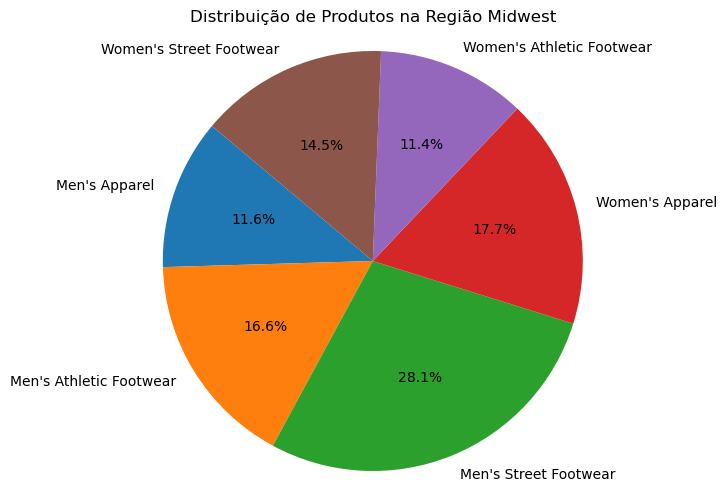

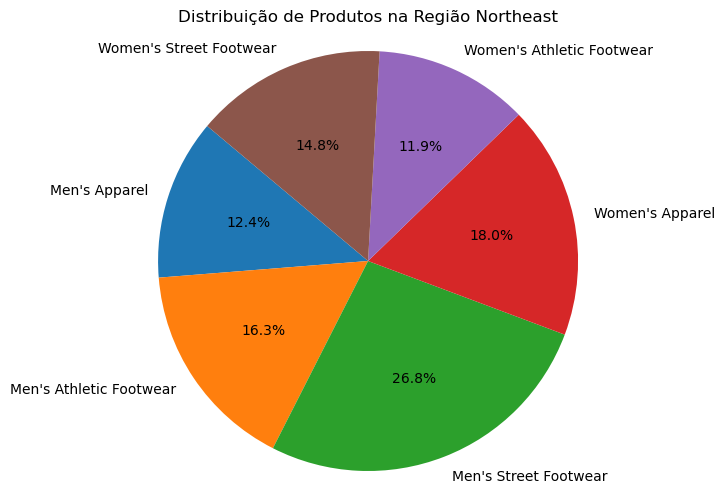

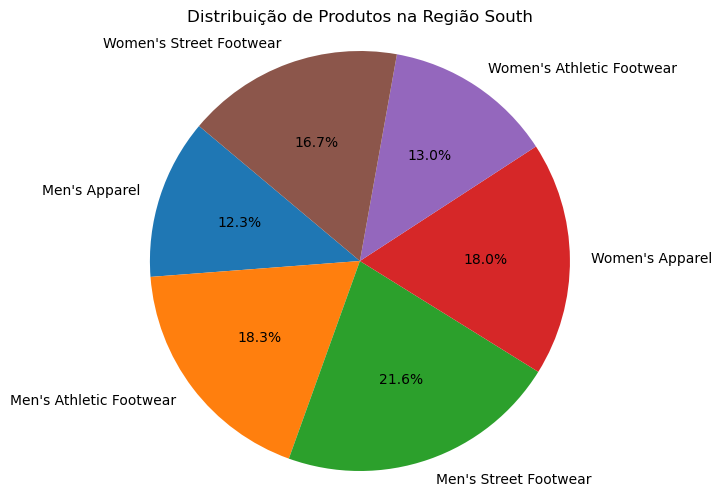

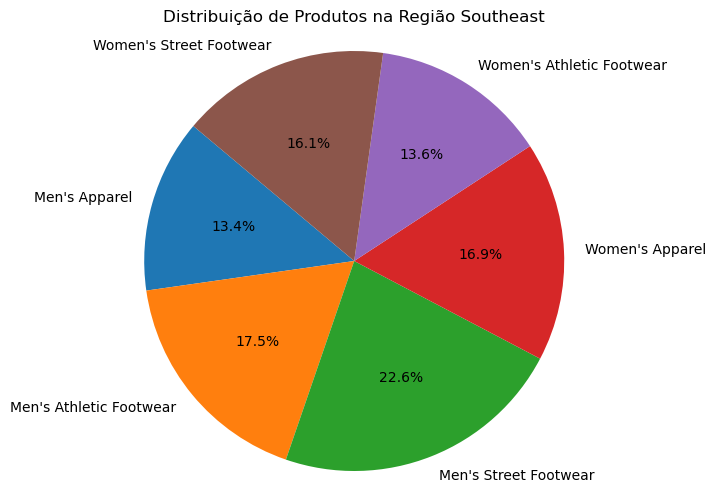

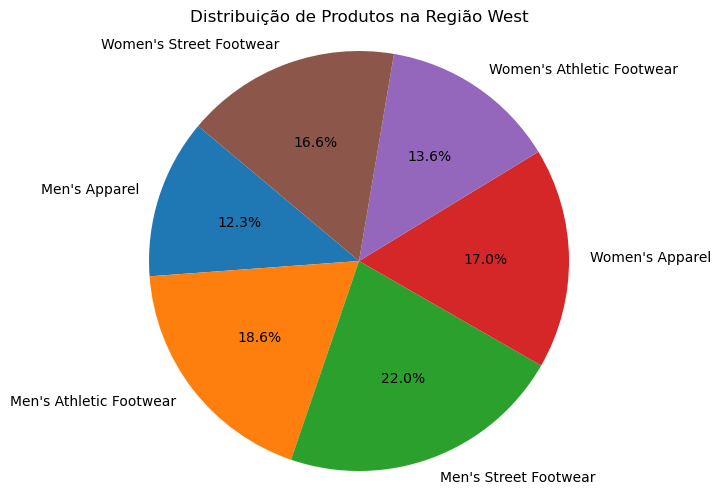

In [50]:
# Agrupamento de produto por região
produto_por_regiao = df.groupby(['Region', 'Product'])['Units Sold'].sum().reset_index()

# Para cada região, criar um gráfico de pizza separado
for regiao in produto_por_regiao['Region'].unique():
    # Filtrar os dados para a região atual
    dados_regiao = produto_por_regiao[produto_por_regiao['Region'] == regiao]
    
    # Criar o gráfico de pizza
    plt.figure(figsize=(8, 6))
    plt.pie(dados_regiao['Units Sold'], labels=dados_regiao['Product'], autopct='%1.1f%%', startangle=140)
    
    # Adicionar título
    plt.title(f'Distribuição de Produtos na Região {regiao}')
    
    # Salvando o gráfico
    plt.savefig(f'C:\\FCD\\Adidas\\produtos_p_cidade{regiao}.png')

    
    # Exibir o gráfico
    plt.axis('equal')  # Para garantir que o gráfico seja uma forma circular
    plt.show()

## 37 - Existem produtos que têm preços elevados, mas baixa rentabilidade?

In [51]:
preco_produto = pd.DataFrame(df.groupby('Product')['Price per Unit'].mean())
margin_produto = pd.DataFrame(df.groupby('Product')['Operating Margin'].mean())

margin_preco = pd.merge(preco_produto, margin_produto, on = "Product")
margin_preco_sorted = margin_preco.sort_values(by="Price per Unit", ascending=False)

In [52]:
# Idenficando produtos que possuem um preço por unidade mais elevado, ao mesmo tempo que possui uma margem operacional pequena
produtos = margin_preco[
    (margin_preco['Price per Unit'] > margin_preco['Price per Unit'].mean()) & 
    (margin_preco['Operating Margin'] < margin_preco['Operating Margin'].mean())
]

produtos

,Price per Unit,Operating Margin
Product,,
Men's Apparel,50.321918,0.413225


## 26 - Qual a previsão de vendas para o futuro?

In [53]:
# Selecionando as colunas para o modelo
features = ['Price per Unit', 'Region', 'Product Category', 'Product Genre', 'Month', 'City', 'Sales Method']

# Preparando as variáveis categóricas com Label Encoding
le = LabelEncoder()
for col in ['Region', 'Product Category', 'Product Genre', 'City', 'Sales Method']:
    df[col] = le.fit_transform(df[col])

# Separando os dados em conjuntos de treino e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predições e avaliação do modelo
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

C:\Users\Beatz\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(10850.186815531992, 0.7689478908180604)

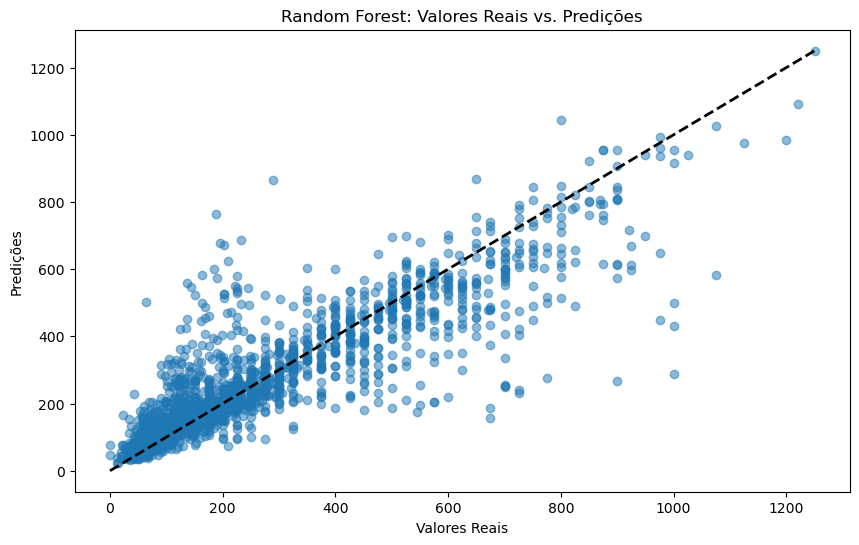

<Figure size 640x480 with 0 Axes>

In [54]:
# Plotando os valores reais vs. preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Random Forest: Valores Reais vs. Predições')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\performance_modelo.png'
plt.savefig(file_path_resultados)

In [55]:
# Calculando a importância das características
feature_importances = rf.feature_importances_

# Criando um DataFrame para visualização
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenando as características pela importância
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df

,Feature,Importance
0,Price per Unit,0.259940
5,City,0.218419
6,Sales Method,0.163113
1,Region,0.123744
4,Month,0.110575
2,Product Category,0.071743
3,Product Genre,0.052466


## 38 - Quais variáveis mais impactam no número de vendas?

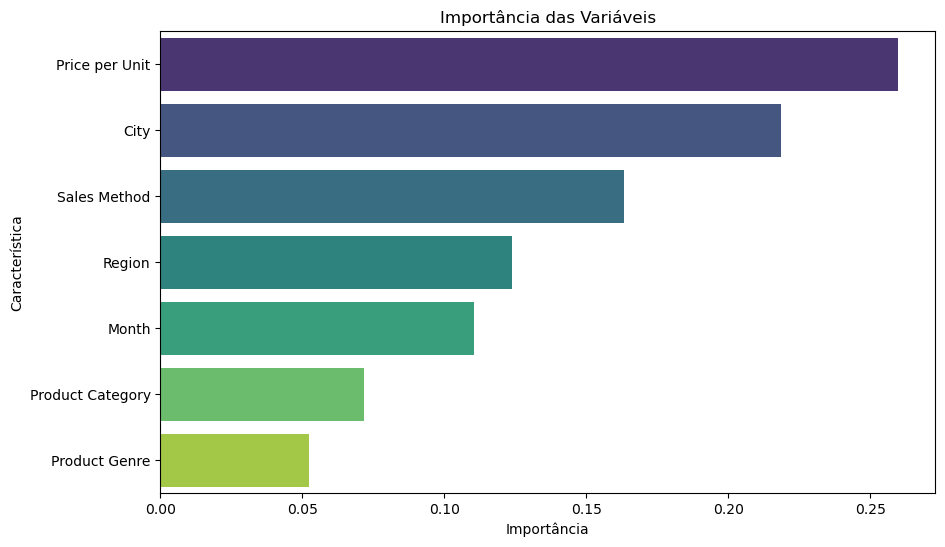

In [56]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.title('Importância das Variáveis')

# Salvando o gráfico
file_path_resultados = 'C:\\FCD\\Adidas\\importancia_variaveis.png'
plt.savefig(file_path_resultados)

# Showing the plot
plt.show()